## Shainan Agrawal
### Date: 11/15/2020
<font color="red">

## Assignment Grade: 34/35
    
## Excellent. 
</font>

<font color="blue">
    
    
### Grading Comments – Totality of all points noted below resulted in a reduction of 1 Points.
    
1. Answer 3 is slightly contradictory. You mention that cylinders, origin, and car_make are all discrete categorical variables. In reality, only car_make and origin are categorical. Cylinders is discrete but is truly numeric since you collect the data for Cylinders by counting the number of cylinders. Therefore, it should be  a candidate for inclusion in the model. You can exclude some categorical variables and not others if you think cylinders is a categorical variable. 
    
2. Answer 4: did not address the correlation among independent variables. Cylinders, weight, displacement, and HP all have fairly strong correlation with MPG. They should all be candidates for inclusion. However, because of high correlation among the independent variables themselves, it does not make sense to include all - they all do not contribute significantly towards predicting MPG. That is why eliminated cylinders, HP, and displacement since of the 4, weight has the highest correlation with MPG but also because Cylinders, displacement, and HP are themselves are highly correlated with weight. 
</font>


### Linear Regression algorithm to predict mileage of automobiles
### A program to read a csv file containing information of various factors that affect the mileage. Choose the most correlated variable with the mileage and use linear regression to predict the mpg. 

In [1]:
import pandas as pd
import statsmodels as st

autoMPG_df = pd.read_csv('/Users/cis_developer/CIS5357Fall2020/AutoMPG.csv',header=0)

In [2]:
autoMPG_df

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
#Question 1:
autoMPG_df.shape

(392, 9)

##### Answer:1 The number (392,9) represents that there are 392 rows and 9 colums in the dataframe AutoMPG.csv i.e, it'a a 2-D array which has 9 colums and 392 rows in it. 

In [4]:
#Question 2:
autoMPG_df.columns

Index(['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acceleration',
       'model_year', 'origin', 'car_name'],
      dtype='object')

##### Answer:2 The above list of attributes i.e. mpg, cylinders, displacement,hp,weight,acceleration,model_year, origin and car_name are recorded for each automobile

In [5]:
#Question 3:
autoMPG_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
hp                int64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

##### Answer 3: All variables have numeric data types except car_name. Cylinders, model_year and origin are discrete variables(categorical). Since the car_name does not have a numeric data type,it wont be used to make a Linear Regression model. Furthermore, model_year and origin are discrete and cannot be used to make a Linear Regression model. Since no of cylinders affect the mpg of a automobile, it shall be used in the model. Thus the 3 variables,namely model_year,origin,car_name will be removed from the new data frame.

In [6]:
# New data frame after removing the attributes.

autoMPG_clean_df = autoMPG_df[['mpg','cylinders','displacement', 'hp', 'weight', 'acceleration']]
print(autoMPG_clean_df.dtypes,'\n')
print(autoMPG_clean_df.describe())

mpg             float64
cylinders         int64
displacement    float64
hp                int64
weight            int64
acceleration    float64
dtype: object 

              mpg   cylinders  displacement          hp       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  
count    392.000000  
mean      15.541327  
std        2.758864  
min        8.000000  
25%       13.775000  
50%       15.500000  
75%       17.025000  
max       24.80

###### The basic stats shows that each variable and output column has 392 observations. Therefore, there are no missing values

In [7]:
#Question 4:
autoMPG_clean_df.corr()

,mpg,cylinders,displacement,hp,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


##### Answer:4 Here, the dependent variable is mpg and independent variables are displacement,hp,weight,acceleration. Comapring the correlation coefficient between mpg and all other independent variables, the strongest correlation is between mpg and weight followed by mpg and displacement. 
##### If we look at the row for displacement and column for mpg we find that the value of the correlation coefficient between mpg and weight is -0.83 followed by the correlation coefficient between mpg and displacement, value is -0.81. Similar values for all other variables are lower than this value. This signifies that weight is the most highly correlated variable with mpg. Therefore, values of weight would be helpful in predicting values for variable mpg.

In [8]:
#Qusetion 5:
#Based on the value of correlation coefficient, weight is most highly correlated with mpg i.e the dependent variable.
#New data frame containing only these two variables:

weight_mpg_df = autoMPG_df[['mpg', 'weight']]
weight_mpg_df
    

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
387,27.0,2790
388,44.0,2130
389,32.0,2295
390,28.0,2625


In [9]:
#Qusetion 6:
pd.set_option('precision',2)
weight_mpg_df.describe()

,mpg,weight
count,392.00,392.00
mean,23.45,2977.58
std,7.81,849.40
min,9.00,1613.00
25%,17.00,2225.25
50%,22.75,2803.50
75%,29.00,3614.75
max,46.60,5140.00


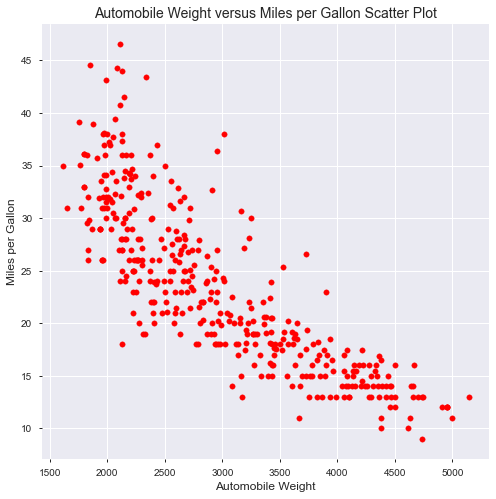

In [10]:
#Qusetion 7:
import matplotlib.pyplot as  plt
plt.figure(figsize=(8,8))
plt.style.use('seaborn')  
plt.scatter(weight_mpg_df['weight'],weight_mpg_df['mpg'],s=30,marker="o",color='r')
plt.title('Automobile Weight versus Miles per Gallon Scatter Plot',fontsize=14)
plt.ylabel('Miles per Gallon',fontsize=12)
plt.xlabel('Automobile Weight',fontsize=12)
plt.tick_params(axis ='both', which ='both', length = 3)

###### Answer 7: The above scatter plot displays a negative correlation between Automobile Weight and Miles per Gallon(mpg) (downward sloping non linear relationship between weight and mpg). There is a strong negative relationship between Automobile Weight and Miles per Gallon i.e. as the weight of the automobile increases, the Mileage of the automobile decreases and vice versa.

In [11]:
#Qusetion 8:
import statsmodels.api as sm

x_independent_var = weight_mpg_df['weight']
y_dependent_var = weight_mpg_df['mpg']
x_independent_var = sm.add_constant(x_independent_var)
linear_model = sm.OLS(y_dependent_var,x_independent_var).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 15 Nov 2020   Prob (F-statistic):          6.02e-102
Time:                        13:17:18   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Answer:8 (a)
##### The linear model is given by the equation:  
<font size=2>

$\hat y = {b}_{0} + {b}_{1}*x$
</font>

where <br>
$\hat y$ = predicted value of output i.e. mpg <br>
${b}_{0}$ = value of the output variable when the value of weight(variable 1) is zero. It is also the value at which the straight line cuts the vertical axis. <br>
${b}_{1}$ = slope. Rate at which the value of the mpg(output variable) increases/decreases with a unit increase in the value of weight(variable 1). Positive value for ${b}_{1}$ implies positive relationship or upward slopping line while a negative for ${b}_{1}$ would imply negative or downward sloping line. 
###### Based on the values extracted from the results of our model, our linear model is:<br>

<font size=2>
$\hat y = 46.21 - 0.0076*x$
</font>

<font size=2>
    where, y = mpg
    x = weight
</font>

###### Answer:8 (b) The closer R-sqaured value is to 1.00, the better the realtionship. That is all values of mpg variable fall exactly on the fitted straight line. R-Squared = 0.69 is indicative of a not a very strong model in terms of predictive power. It further indicates that The model coud may be improved by adding more variables.

#### Answer:8 (c) ${P>|t|}$ : We know that, this measures the significance or the value of both the ${b}_{0}$ and ${b}_{1}$ in  predicting values for the output variable. The closer these probabilties are to 0, the more the contribution of these elements. In our output, the weight predictor variable is statistically significant in predicting the output mpg because its p-value equal 0.000.



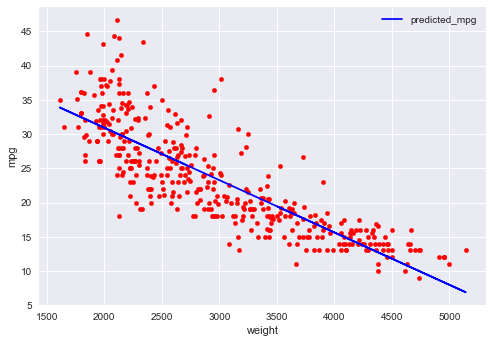

In [12]:
#Qusetion:9
predict_mpg = linear_model.predict(x_independent_var)
new_index = len(weight_mpg_df.columns)
weight_mpg_df.insert(new_index,'predicted_mpg', predict_mpg)
ax=weight_mpg_df.plot(kind='scatter', x='weight', y= 'mpg', color='red')
weight_mpg_df.plot(kind='line', x='weight', y= 'predicted_mpg', ax=ax, color='blue')


In [13]:
#Question 10:
unknown_weight = [1,3699]
prediction = linear_model.predict(unknown_weight)
print('The independent varibale is Weight to predict MPG.')
print (f"If we give weight as {unknown_weight[1]}, the predicted MPG value would be {format(prediction[0],'.2f')}")

The independent varibale is Weight to predict MPG.
If we give weight as 3699, the predicted MPG value would be 17.93
